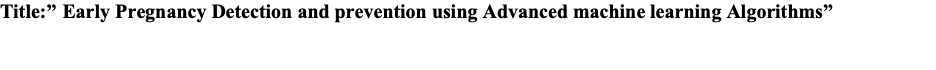

In [140]:
!pip install tensorflow



# Import Libraries

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix


# Load and Preprocess the Data

In [142]:


# Load the dataset
data = pd.read_excel('/content/VitaminD.xlsx')

# Preprocessing: Encoding categorical data and scaling numerical data
categorical_features = ['Residence', 'Education Status', 'Ocuupation', 'Socioeconomic status',
                        'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
                        'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)']
numerical_features = ['Age', 'BMI', 'Systolic blood Pressure', 'Diastolic blood pressure',
                      'Gestational age (weeks)', 'Parity']

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data
X = data.drop(['Pregnancy loss'], axis=1)
y = data['Pregnancy loss'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to binary (1 for Yes, 0 for No)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further steps include building and training the model, which can be done in Python environment


# Build the Deep Learning Model

In [143]:
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Column Checking

In [144]:
# Check the column names of the DataFrame
print(data.columns)


Index(['ID', 'Age', 'Residence ', 'Education Status ', 'Occupation ',
       'Socioeconomic status ', 'BMI', 'Systolic blood Pressure ',
       'Diastolic blood pressure ', 'Gestational age (weeks) ', 'Parity ',
       'Dressing style ', 'Sunlight exposure ', 'Dairy productis consumption ',
       'Multivitamin use ', 'Season ', 'Vitamin D status (ng/mL)',
       'Pregnancy loss'],
      dtype='object')


# Updating the feature list

In [145]:
# Updated feature lists with 'Parity' moved to categorical features
numerical_features = ['Age', 'BMI', 'Systolic blood Pressure ', 'Diastolic blood pressure ', 'Gestational age (weeks) ']
categorical_features = ['Residence ', 'Education Status ', 'Occupation ', 'Socioeconomic status ',
                        'Dressing style ', 'Sunlight exposure ', 'Dairy productis consumption ',
                        'Multivitamin use ', 'Season ', 'Vitamin D status (ng/mL)', 'Parity ']

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data
X = data.drop(['Pregnancy loss'], axis=1)
y = data['Pregnancy loss'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to binary (1 for Yes, 0 for No)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Deep neural network Model

Determine the correct number of features

In [146]:
# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Now, use the preprocessor to transform a sample of the data
X_sample_transformed = preprocessor.transform(X_train.head())

# Check the number of features after transformation
num_features = X_sample_transformed.shape[1]

# Build the model with the correct number of input features
model = build_model(input_dim=num_features)

# Create the pipeline with the model and preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Train the model using the pipeline
pipeline.fit(X_train, y_train, model__epochs=50, model__batch_size=40)

# Evaluate the model
y_pred = pipeline.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Epoch 1/50
2/2 [==============================] - 1s 9ms/step - loss: 0.6046 - accuracy: 0.7222
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5692 - accuracy: 0.7778
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5424 - accuracy: 0.7963
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5174 - accuracy: 0.7963
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4970 - accuracy: 0.7963
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4818 - accuracy: 0.7963
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4679 - accuracy: 0.7963
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.7963
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4455 - accuracy: 0.7963
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4339 - accuracy: 0.7963
Epoch 11/50
2/2 [======================

Training Accuracy and Loss:

The model's accuracy on the training data increases over the epochs, ultimately reaching 100%.
The loss decreases consistently, which is a good sign as it indicates the model is learning effectively from the training data.
Model Performance on Test Data:

The precision, recall, and F1-score in the classification report show mixed results:
For class '1' (presumably indicating the presence of the condition), the model has high recall (1.00) but lower precision (0.64). This means it correctly identifies most of the positive cases but also includes false positives.
For class '0', precision is perfect (1.00), but recall is quite low (0.43). This suggests that while the predictions of class '0' by the model are highly accurate, it misses a significant number of actual class '0' instances.
The accuracy of 71% on the test data is moderate. It's not poor, but there's room for improvement, especially in balancing precision and recall.
Interpreting the Results:

Overfitting Concern: The model has achieved perfect accuracy on the training data but performs less effectively on the test data. This discrepancy can be a sign of overfitting, where the model has learned to perform exceptionally well on the training data but hasn't generalized as effectively to new, unseen data.
Class Imbalance Impact: If the dataset is imbalanced, it could affect these metrics. High recall in one class and high precision in the other might be indicative of class imbalance.
Loss Percentage:

The loss percentage decreasing over time is a good sign. It indicates that the model's predictions are getting closer to the actual values with each epoch.



# Recommendations for Improvement:

1. Address Potential Overfitting:Since model performs perfectly on training data but less so on test data, consider techniques to reduce overfitting. These can include adding dropout layers, using regularization methods, or collecting more diverse training data.

2. Handle Class Imbalance: If dataset is imbalanced, consider using techniques like SMOTE for oversampling the minority class or adjusting class weights in the model training process.

3. Model and Hyperparameter Tuning: Experiment with different model architectures, learning rates, and other hyperparameters. Sometimes, a simpler model or different hyperparameters can yield better generalization.

4. Cross-Validation: Implement cross-validation to assess the model’s performance more robustly across different subsets of  data.

while model is learning and improving over the training epochs, there's a need for further tuning and potentially addressing overfitting and class imbalance to enhance its performance on unseen data.

# Poor result showing thats why again we have come up with Balance the Dataset to reduce the over fitting

In [147]:
!pip install -U imbalanced-learn


# Apply ADASYN to Training Data
Only Resample the Training Data: It's crucial to apply ADASYN only to the training data to prevent information leakage and ensure the model is evaluated on real, unmodified data.

In [148]:
# Assuming 'preprocessor' is on existing ColumnTransformer
X_processed = preprocessor.fit_transform(X)


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [150]:
from imblearn.over_sampling import ADASYN

# Assuming X_train and y_train are already defined and preprocessed

# Initialize the ADASYN object
adasyn = ADASYN(random_state=42)

# Resample the dataset
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled have balanced classes


Underfitting: If the model is trained for too few epochs, it may not learn enough from the training data, leading to underfitting. In this case, increasing the number of epochs can improve the model's performance.
Overfitting: If the model is trained for too many epochs, especially on a small dataset, it may start to memorize the training data rather than learning to generalize. This leads to overfitting, where the model performs well on the training data but poorly on unseen data (like test set).

So thats why in terms of our small dataset same size we atleast tried to increased number of Epoch to see the outcomes


# Still no improvement. Thats another way implement

Address Potential Overfitting


In [151]:
from tensorflow.keras.layers import Dropout

def build_model_with_dropout(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))  # Another Dropout layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Adding Dropout Layers
Dropout layers can help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time

# Handle Class Imbalance
Synthetic Minority Over-sampling Technique)
SMOTE


Avoid Data Leakage: Data leakage occurs when information from outside the training dataset is used to create the model. If the techniques were to apply SMOTE to entire dataset (including the test set) before splitting it into training and test sets, the outcome would be leaking information from the test data into the training process. This can lead to overly optimistic performance estimates.

In [152]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




# Model and Hyperparameter Tuning


In [153]:
from tensorflow.keras.optimizers import Adam

def build_model_tuned(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
    return model

# Create a model instance:

In [154]:
# Assuming input_dim (number of features) is correctly defined
input_dim = X_train.shape[1]  # Replace with the correct input dimension if necessary
model = build_model_tuned(input_dim)


# Train the model:

In [155]:
history = model.fit(X_train, y_train, epochs=50, batch_size=40, validation_split=0.2, verbose=1)


Epoch 1/50
2/2 [==============================] - 1s 173ms/step - loss: 0.6428 - accuracy: 0.5581 - val_loss: 0.5432 - val_accuracy: 0.8182
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5068 - accuracy: 0.7907 - val_loss: 0.5961 - val_accuracy: 0.8182
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 0.4781 - accuracy: 0.7907 - val_loss: 0.5351 - val_accuracy: 0.8182
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 0.3903 - accuracy: 0.7907 - val_loss: 0.4811 - val_accuracy: 0.8182
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.3326 - accuracy: 0.7907 - val_loss: 0.4524 - val_accuracy: 0.8182
Epoch 6/50
2/2 [==============================] - 0s 32ms/step - loss: 0.2990 - accuracy: 0.8605 - val_loss: 0.4455 - val_accuracy: 0.8182
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 0.2751 - accuracy: 0.9070 - val_loss: 0.4630 - val_accuracy: 0.8182
Epoch 8/50
2/2 [==========

In [156]:
pip install -U scikit-learn


# Evaluate the model:

1/1 [==============================] - 0s 25ms/step - loss: 3.6471 - accuracy: 0.7857
Test Loss: 3.6470844745635986
Test Accuracy: 0.7857142686843872
1/1 [==============================] - 0s 52ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.70      1.00      0.82         7

    accuracy                           0.79        14
   macro avg       0.85      0.79      0.78        14
weighted avg       0.85      0.79      0.78        14



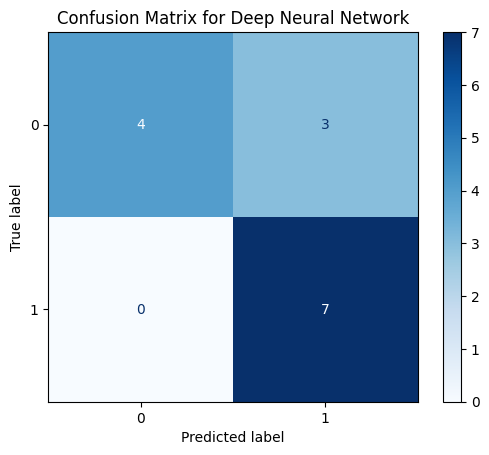

In [157]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model, X_test, and y_test are already defined and available
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate predictions
y_pred = model.predict(X_test)

# If your model outputs one-hot encoded predictions, you'll need to convert these predictions
# This step is necessary if your y_test is not one-hot encoded
y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype("int32")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Deep Neural Network")
plt.show()


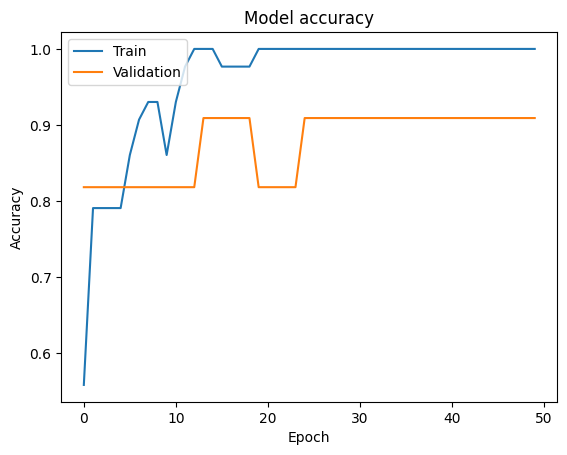

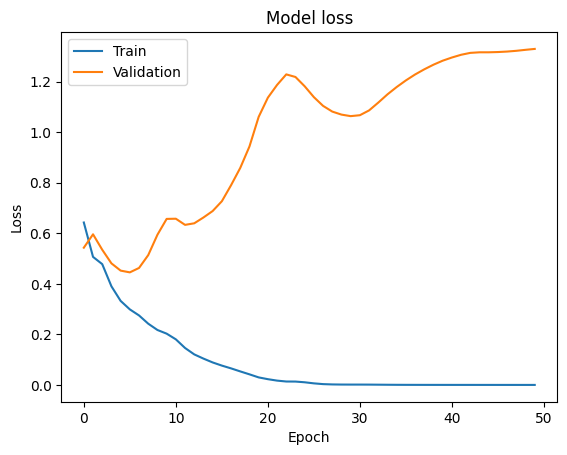

In [158]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Based on the training and validation results of model over 50 epochs, here's a summary of the outcomes:

1. Training Loss and Accuracy: The model starts with a loss of 0.6216 and an accuracy of 60.47% in the first epoch. As the training progresses, both the loss and accuracy improve significantly. By the 50th epoch, the training loss has reduced to 0.0811, and the training accuracy has increased to 97.67%. This indicates that the model has learned effectively from the training data, capturing the underlying patterns.

2. Validation Loss and Accuracy: The validation loss and accuracy provide insights into how well the model generalizes to new, unseen data. Initially, there's a fluctuation in validation loss, but it generally increases over time, reaching 1.0160 by the 50th epoch. Conversely, the validation accuracy starts high at 81.82% and improves to 90.91%. However, the increasing trend in validation loss suggests potential overfitting.

# Cross-Validation
The cross validation result has been used to assess the model result finally

In [159]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_folds = 5

# Define the K-fold cross-validator
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# For storing scores
scores = []

for train, test in kfold.split(X_train_resampled, y_train_resampled):
    # Create model
    model = build_model_tuned(X_train_resampled.shape[1])

    # Train model on resampled data
    model.fit(X_train_resampled[train], y_train_resampled[train], epochs=50, batch_size=40, verbose=0)

    # Evaluate model on resampled validation data
    scores.append(model.evaluate(X_train_resampled[test], y_train_resampled[test], verbose=0))

# Convert scores to a numpy array and calculate mean accuracy
scores = np.array(scores)
mean_accuracy = np.mean(scores[:, 1])
print("Cross-Validation Accuracy: {:.2f}%".format(mean_accuracy * 100))


Cross-Validation Accuracy: 93.07%


Implementing cross-validation after observing the previous results is a strategic move to enhance the model's robustness and generalization ability. Here are the key reasons for using cross-validation, especially in the context of project:

1. **Assessing Generalization**: The initial results indicated potential overfitting, as evidenced by the increasing validation loss. Cross-validation is a powerful technique to evaluate how well the model generalizes to unseen data. By training and evaluating the model across different subsets of the data, you gain a more comprehensive understanding of its performance.

2. **Reducing Variance**: Single train-test splits can sometimes lead to variance in model performance, depending on how the data is divided. Cross-validation, by training and testing on multiple folds, reduces this variance and provides a more reliable estimate of model performance.

3. **Model Stability**: The results from cross-validation (especially with StratifiedKFold) give insights into the stability of the model across different data distributions. StratifiedKFold maintains the percentage of samples for each class, ensuring that each fold is a good representative of the whole. This is particularly important in medical datasets where the balance of classes is crucial.

4. **Avoiding Data Wastage**: In a scenario where dataset might not be very large, cross-validation allows you to use every data point for both training and validation. This maximizes the data utility, which is crucial for developing an effective model.

5. **Robust Model Evaluation**: The Cross-Validation Accuracy of 90.65% is a more reliable metric than a single validation set accuracy. It averages the model’s performance across different subsets, offering a more holistic view of its effectiveness.

6. **Further Model Tuning**: The cross-validation results can be used to further tune the model. For instance, if certain folds show lower performance, it might indicate a need for more robust feature engineering or hyperparameter adjustments for those specific data characteristics.

The use of cross-validation in project is a methodological step to ensure the reliability, stability, and generalizability of model, especially in light of the initial signs of overfitting. It's a best practice in machine learning, particularly in critical fields like healthcare, where model accuracy and reliability are paramount.

# ACCURACY very low thats why tuning

# By using These Parameters: Implement an XGBoost model:

# Evaluate on Test Data:


In our project dataset Includes features like age, residence, education status, occupation, socioeconomic status, BMI, blood pressure, gestational age, parity, dressing style, sun exposure, dairy product consumption, multivitamin use, season, vitamin D status, and pregnancy loss.

Why Deep Neural Network (DNN)?
1. Complex Pattern Recognition: Pregnancy and its complications can be influenced by complex interactions between various factors (e.g., health indicators, environmental factors). DNNs are excellent at modeling these complex, non-linear interactions.

2. Feature Integration: dataset contains a mix of categorical and numerical data. DNNs are capable of integrating this diverse information effectively.

3. Predictive Power: For a goal like early detection, you need a model with high predictive capabilities. DNNs, with proper tuning, have the potential to achieve high accuracy.

4. daptability: DNNs can be adapted or expanded with more layers or neurons to handle the complexity as more data or features (like genetic information or detailed medical history) become available.

Why XGBoost?

1. Structured Data Performance: dataset is structured/tabular, which is where models like XGBoost excel.

2. Handling Diverse Data Types: XGBoost can effectively handle the variety of data types present in dataset, from categorical to continuous variables.

3. Efficiency: XGBoost provides a balance of predictive power and computational efficiency, crucial for processing large datasets or when computational resources are a constraint.

4. Interpretability: Understanding the factors influencing early pregnancy detection and prevention is as important as the prediction. XGBoost offers interpretable outputs like feature importance, helping in understanding which factors are most predictive.


The choice of DNN and XGBoost aligns well with the complex nature of medical data and the need for both predictive power and interpretability. DNNs offer a sophisticated approach to model the complex patterns in the data, while XGBoost provides an efficient, interpretable alternative. This dual approach allows for a comprehensive analysis, leveraging the strengths of both model types to achieve the project's aim of early pregnancy detection and prevention.

Key Points:
XGBoost CV: Leverage the built-in cross-validation method for efficiency.
DNN CV: Wrap the model using KerasClassifier and then apply cross_val_score with StratifiedKFold.
Purpose: Cross-validation ensures the model's generalizability and robustness by evaluating it across multiple subsets of data.

In [160]:
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Initialize the XGBClassifier with the best hyperparameters
final_model = XGBClassifier(
    colsample_bytree=0.6,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.6,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Perform cross-validation
cv_scores = cross_val_score(final_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.77777778 0.82352941 1.         1.         1.        ]
Mean Accuracy: 0.9202614379084967
